In [1]:
import numpy as np
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('axes', axisbelow=True)


## (a)单数据系列

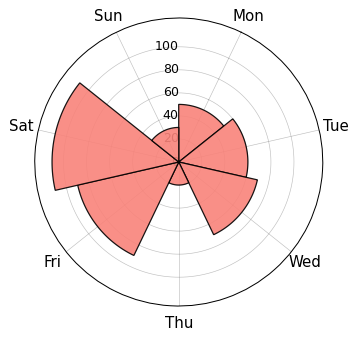

In [2]:
mydata = pd.DataFrame(dict(day=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                           Price=[50, 60, 70, 20, 90, 110, 30]))
n_row = mydata.shape[0]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)
radius = np.array(mydata.Price)

fig = figure(figsize=(4, 4), dpi=90)
# 极坐标条形图，polar为True
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# 方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
# 当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
# 当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
# 方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

# plt.bar(angle,radius, color='#70A6FF',edgecolor="k",width=0.90,alpha=0.9)
plt.bar(angle, radius, color='#F9837A', edgecolor="k", width=0.90, alpha=0.9)
# x轴坐标轴标签
plt.xticks(angle, labels=mydata.day, size=12)
# plt.ylim(-15,125)
plt.ylim(0, 125)
plt.yticks(np.arange(0, 120, 20), verticalalignment='center',
           horizontalalignment='right')

plt.grid(which='major', axis="x", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis="y", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)

plt.show()
# fig.savefig('极坐标图2.pdf')


## (b)单数据系列

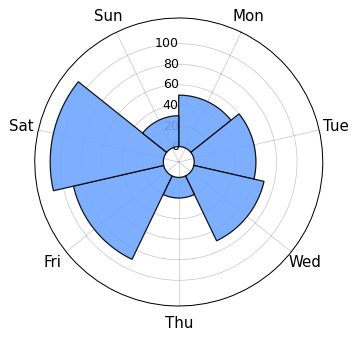

In [3]:
mydata = pd.DataFrame(dict(day=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                           Price=[50, 60, 70, 20, 90, 110, 30]))
n_row = mydata.shape[0]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)
radius = np.array(mydata.Price)

fig = figure(figsize=(4, 4), dpi=90)
# 极坐标条形图，polar为True
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# 方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
# 当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
# 当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
# 方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

plt.bar(angle, radius, color='#70A6FF', edgecolor="k", width=0.90, alpha=0.9)
# plt.bar(angle,radius, color='#F9837A',edgecolor="k",width=0.90,alpha=0.9)
# x轴坐标轴标签
plt.xticks(angle, labels=mydata.day, size=12)
plt.ylim(-15, 125)
# plt.ylim(0,125)
plt.yticks(np.arange(0, 120, 20), verticalalignment='center',
           horizontalalignment='right')

plt.grid(which='major', axis="x", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis="y", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)

plt.show()


## (c)多数据系列

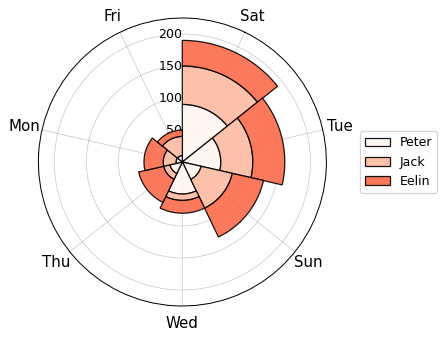

In [4]:
mydata = pd.DataFrame(dict(day=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                           Peter=[10, 60, 50, 20, 10, 90, 30],
                           Jack=[20, 50, 10, 10, 30, 60, 50],
                           Eelin=[30, 50, 20, 40, 10, 40, 50]))

mydata['sum'] = mydata.iloc[:, 1:4].apply(np.sum, axis=1)

mydata = mydata.sort_values(by='sum', ascending=False)  # .iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)
# 绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
# 极坐标条形图，polar为True
cmap = cm.get_cmap('Reds', n_col)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]


fig = figure(figsize=(4, 4), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# 方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
# 当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
# 当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
# 方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

p1 = plt.bar(angle, radius1,
             color=color[0], edgecolor="k", width=0.90, alpha=0.9, label="Peter")
p2 = plt.bar(angle, radius2, color=color[1], edgecolor="k",
             width=0.90, bottom=radius1, alpha=0.9, label="Jack")
p3 = plt.bar(angle, radius3, color=color[2], edgecolor="k",
             width=0.90, bottom=radius1+radius2, alpha=0.9, label="Eelin")
#p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)

# plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center", bbox_to_anchor=(1.25, 0, 0, 1))

plt.ylim(0, 225)
plt.xticks(angle, labels=mydata.day, size=12)
plt.yticks(np.arange(0, 201, 50), verticalalignment='center',
           horizontalalignment='right')
# plt.ylim(-25,225)
# plt.yticks(np.arange(0,225,50))

plt.grid(which='major', axis="x", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis="y", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)

# fig.savefig('极坐标图3.pdf')


## (d)多数据系列

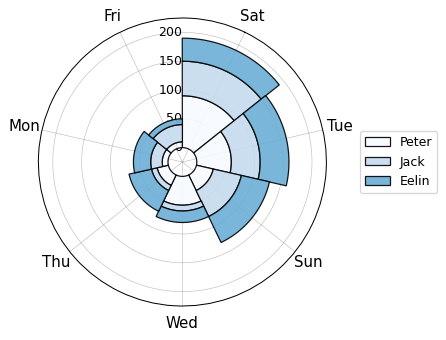

In [5]:
mydata = pd.DataFrame(dict(day=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
                           Peter=[10, 60, 50, 20, 10, 90, 30],
                           Jack=[20, 50, 10, 10, 30, 60, 50],
                           Eelin=[30, 50, 20, 40, 10, 40, 50]))

mydata['sum'] = mydata.iloc[:, 1:4].apply(np.sum, axis=1)

mydata = mydata.sort_values(by='sum', ascending=False)  # .iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)
# 绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
# 极坐标条形图，polar为True
cmap = cm.get_cmap('Blues', n_col)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]


fig = figure(figsize=(4, 4), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# 方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
# 当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
# 当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
# 方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

p1 = plt.bar(angle, radius1,
             color=color[0], edgecolor="k", width=0.90, alpha=0.9, label="Peter")
p2 = plt.bar(angle, radius2, color=color[1], edgecolor="k",
             width=0.90, bottom=radius1, alpha=0.9, label="Jack")
p3 = plt.bar(angle, radius3, color=color[2], edgecolor="k",
             width=0.90, bottom=radius1+radius2, alpha=0.9, label="Eelin")
#p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)

# plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center", bbox_to_anchor=(1.25, 0, 0, 1))

# plt.ylim(0,225)
plt.xticks(angle, labels=mydata.day, size=12)
plt.yticks(np.arange(0, 201, 50), verticalalignment='center',
           horizontalalignment='right')
plt.ylim(-25, 225)
# plt.yticks(np.arange(0,225,50))

plt.grid(which='major', axis="x", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis="y", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)

# fig.savefig('极坐标图3.pdf')
